**KELOMPOK 13**

Arion Syemael Siahaan

Firman Maulana

Razi Al-kindi

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score

In [ ]:
# Download dataset dari Kaggle
!kaggle datasets download -d gaurav2022/mobile-health

# Ekstrak file ZIP
!unzip mobile-health.zip

In [ ]:
# Step 2: Load the dataset
df = pd.read_csv('mhealth_raw_data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215745 entries, 0 to 1215744
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   alx       1215745 non-null  float64
 1   aly       1215745 non-null  float64
 2   alz       1215745 non-null  float64
 3   glx       1215745 non-null  float64
 4   gly       1215745 non-null  float64
 5   glz       1215745 non-null  float64
 6   arx       1215745 non-null  float64
 7   ary       1215745 non-null  float64
 8   arz       1215745 non-null  float64
 9   grx       1215745 non-null  float64
 10  gry       1215745 non-null  float64
 11  grz       1215745 non-null  float64
 12  Activity  1215745 non-null  int64  
 13  subject   1215745 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 129.9+ MB


In [ ]:
df = df.drop(columns=['alx', 'aly', 'alz', 'arx', 'ary', 'arz', 'subject'])

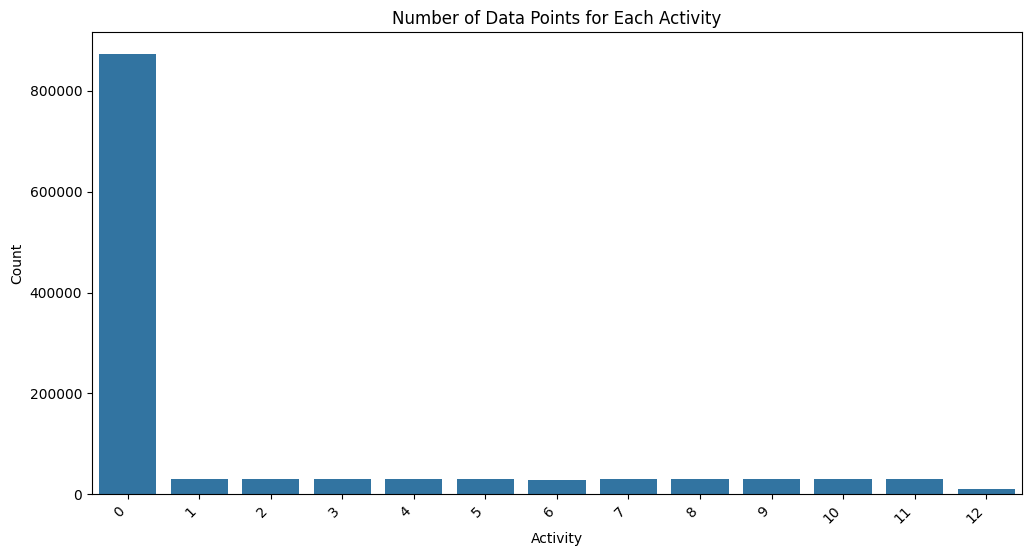

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Activity', data=df)
plt.title('Number of Data Points for Each Activity')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
df = df[df['Activity'].isin([1, 2, 4])]

In [ ]:
df.head(20)

,glx,gly,glz,grx,gry,grz,Activity
6656,-0.20965,-0.88931,-0.50884,-0.058824,-0.93429,-0.34483,1
6657,-0.20965,-0.88931,-0.50884,-0.058824,-0.93429,-0.34483,1
6658,-0.20037,-0.86867,-0.50688,-0.058824,-0.93429,-0.34483,1
6659,-0.20037,-0.86867,-0.50688,-0.078431,-0.93429,-0.34052,1
6660,-0.20037,-0.86867,-0.50688,-0.078431,-0.93429,-0.34052,1
6661,-0.20037,-0.86867,-0.50688,-0.078431,-0.93429,-0.34052,1
6662,-0.21892,-0.87242,-0.50688,-0.078431,-0.93429,-0.34052,1
6663,-0.21892,-0.87242,-0.50688,-0.078431,-0.93429,-0.34052,1
6664,-0.21892,-0.87242,-0.50688,-0.078431,-0.93429,-0.34052,1
6665,-0.20223,-0.87992,-0.49116,-0.078431,-0.93429,-0.34052,1


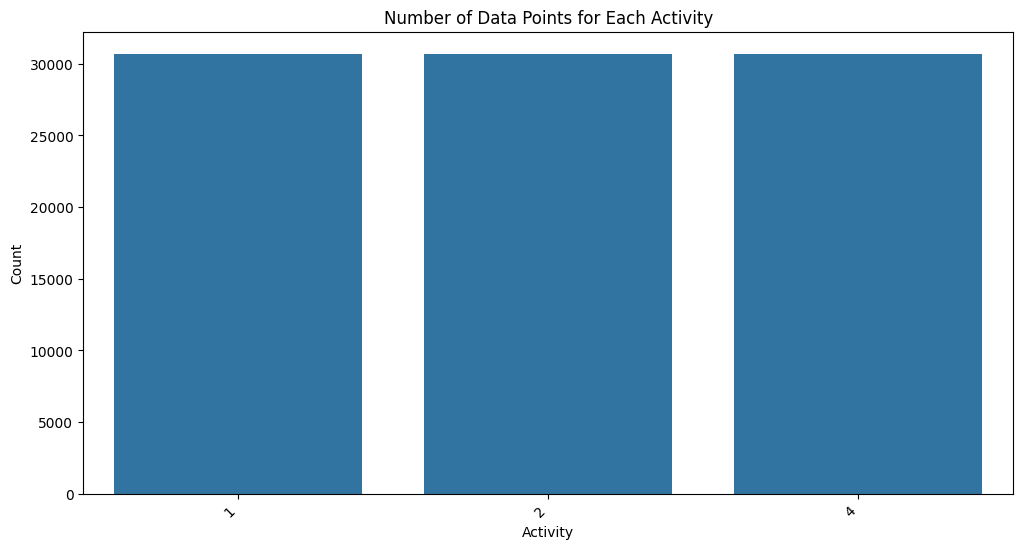

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Activity', data=df)
plt.title('Number of Data Points for Each Activity')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
df['Activity'].value_counts()

,count
Activity,
1,30720
2,30720
4,30720


In [ ]:
df.shape

(92160, 7)

In [ ]:
# Tentukan jumlah baris per input (20 baris per 50 Hz)
num_rows_per_input = 20

# Pisahkan label Activity dan data numerik
activity_labels = []  # Untuk menyimpan label Activity
averages = []  # Untuk menyimpan rata-rata data numerik

for i in range(0, len(df) - num_rows_per_input + 1, num_rows_per_input):
    # Ambil label Activity dari baris pertama pada setiap grup
    activity_label = df['Activity'].iloc[i]
    activity_labels.append(activity_label)

    # Hitung rata-rata untuk kolom numerik saja
    average_value = df.iloc[i:i + num_rows_per_input].drop(columns=['Activity']).mean().values
    averages.append(average_value)

# Ubah rata-rata dan label Activity ke array numpy
input_array = np.array(averages)
activity_labels_array = np.array(activity_labels)

# Tampilkan bentuk data rata-rata
print("Bentuk data rata-rata untuk model:", input_array.shape)

# Tampilkan nilai unik dari label Activity
print("\nNilai unik pada label Activity:")
print(np.unique(activity_labels_array))

# Gabungkan data numerik dengan label Activity jika diperlukan
combined_array = np.column_stack((input_array, activity_labels_array))

# Tampilkan bentuk data gabungan
print("\nBentuk data gabungan (numerik + Activity):", combined_array.shape)

# Simpan ke file CSV
columns = list(df.drop(columns=['Activity']).columns) + ['Activity']
output_df = pd.DataFrame(combined_array, columns=columns)
output_df.to_csv('averages_inputs.csv', index=False)
print("\nRata-rata data dan label Activity berhasil disimpan ke file 'averages_inputs.csv'")


Bentuk data rata-rata untuk model: (4608, 6)

Nilai unik pada label Activity:
[1 2 4]

Bentuk data gabungan (numerik + Activity): (4608, 7)

Rata-rata data dan label Activity berhasil disimpan ke file 'averages_inputs.csv'


In [ ]:
output_df.head(20)

,glx,gly,glz,grx,gry,grz,Activity
0,-0.206957,-0.878705,-0.504913,-0.064706,-0.933675,-0.348060,1.0
1,-0.207144,-0.883301,-0.501474,-0.067941,-0.930800,-0.353986,1.0
2,-0.208440,-0.882177,-0.503240,-0.065882,-0.927104,-0.352800,1.0
3,-0.210017,-0.875140,-0.506779,-0.064411,-0.943224,-0.342349,1.0
4,-0.211782,-0.875421,-0.508448,-0.064510,-0.938399,-0.346660,1.0
5,-0.214472,-0.877861,-0.509431,-0.067451,-0.939630,-0.338471,1.0
6,-0.216696,-0.877110,-0.504322,-0.069118,-0.938401,-0.342779,1.0
7,-0.210204,-0.879078,-0.502849,-0.064314,-0.939323,-0.346122,1.0
8,-0.213449,-0.885084,-0.504422,-0.069608,-0.934392,-0.346550,1.0
9,-0.212801,-0.881706,-0.500196,-0.076471,-0.933571,-0.348600,1.0


**FUNGSI AKTIVASI**

In [ ]:
# Fungsi Softmax
def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x, axis=0)

# Fungsi RELU
def relu(x):
    return max(0, x)

def relu_derivative(x):
    return 1 if x > 0 else 0

# Cross-Entropy Loss
def cross_entropy(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-12, 1. - 1e-12)  # Mencegah log(0)
    return -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]

MODEL NEURAL NETWORK

In [ ]:
# Fungsi Pelatihan dengan Backpropagation
def bp_fit(X, target, layer_conf, max_epoch=50, max_error=0.01, learn_rate=0.1, print_per_epoch=10):
    np.random.seed(1)
    # Inisialisasi layer dengan bias jika bukan layer terakhir
    n = [np.empty(j + 1) if i < len(layer_conf) - 1 else np.empty(j) for i, j in enumerate(layer_conf)]
    w = [np.random.rand(layer_conf[i] + 1, layer_conf[i + 1]) - 0.5 for i in range(len(layer_conf) - 1)]
    dw = [np.zeros_like(w[i]) for i in range(len(w))]
    d = [np.empty(s) for s in layer_conf[1:]]
    loss_history = []

    # Inisialisasi bias di semua layer kecuali output
    for i in range(0, len(n) - 1):
        n[i][-1] = 1  # Bias node diisi dengan 1

    epoch = 0
    loss = float('inf')

    while (max_epoch == -1 or epoch < max_epoch) and loss > max_error:
        epoch += 1
        loss = 0

        for r in range(len(X)):
            # Forward pass
            n[0][:-1] = X[r]  # Salin input ke array n[0] tanpa memodifikasi elemen terakhir (bias)
            for L in range(1, len(layer_conf)):
                if L < len(layer_conf) - 1:
                    # Lapisan tersembunyi dengan bias
                    pre_activation = np.dot(n[L - 1], w[L - 1])  # Hasil sebelum aktivasi
                    n[L][:-1] = [relu(x) for x in pre_activation]  # Terapkan ReLU elemen demi elemen
                else:
                    # Lapisan output tanpa bias
                    n[L][:] = softmax(np.dot(n[L - 1], w[L - 1]))

            # Calculate cross-entropy loss
            loss += cross_entropy(target[r], n[-1])

            # Backpropagation
            d[-1] = target[r] - n[-1]  # Gradien output untuk cross-entropy dengan softmax

            # Update weights
            for L in range(len(layer_conf) - 1, 0, -1):
                dw[L - 1] = learn_rate * np.outer(n[L - 1], d[L - 1])
                if L > 1:
                    pre_activation = np.dot(n[L - 2], w[L - 2])  # Hasil sebelum aktivasi ReLU
                    relu_grad = [relu_derivative(x) for x in pre_activation]  # Gradien ReLU elemen demi elemen
                    d[L - 2] = (d[L - 1] @ w[L - 1][:-1].T) * np.array(relu_grad)  # Update gradien
                w[L - 1] += dw[L - 1]

        loss /= len(X)
        loss_history.append(loss)

        if print_per_epoch > -1 and epoch % print_per_epoch == 0:
            print(f'Epoch {epoch}, Loss: {loss}')

    return w, epoch, loss

In [ ]:
# Fungsi Prediksi
def bp_predict(X, w):
    predict = []
    n = [np.empty(len(i)) for i in w]
    nin = [np.empty(len(i[0])) for i in w]

    n.append(np.empty(len(w[-1][0])))

    for x in X:
        n[0][:-1] = x  # Salin input ke lapisan pertama

        for L in range(0, len(w)):
            nin[L] = np.dot(n[L], w[L])  # Hasil sebelum aktivasi
            if L == len(w) - 1:  # Lapisan terakhir
                n[L + 1][:len(nin[L])] = softmax(nin[L])  # Softmax untuk output
            else:
                # Terapkan ReLU elemen demi elemen
                n[L + 1][:len(nin[L])] = [relu(x) for x in nin[L]]

        predict.append(n[-1].copy())  # Salin hasil ke daftar prediksi
    return predict


**ONE HOT ENCODING DAN DECODING**

In [ ]:
# Fungsi One-Hot Encoding dan Decoding
def onehot_enc(lbl, min_val=0):
    mi = min(lbl)
    enc = np.full((len(lbl), max(lbl) - mi + 1), min_val, np.int8)
    for i, x in enumerate(lbl):
        enc[i, x - mi] = 1
    return enc

def onehot_dec(enc, mi=0):
    return [np.argmax(e) + mi for e in enc]

**TRAINING MODEL**

In [ ]:
#Pisahkan Label dari dataset
X = combined_array[:, :-1]
Y = combined_array[:, -1]

# One-hot encoding pada target
encoder = OneHotEncoder(sparse_output=False)
Y_encoded = encoder.fit_transform(Y.reshape(-1, 1))

# Normalisasi fitur X
X_scaled = minmax_scale(X)

# Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_encoded, test_size=0.3, random_state=42)

In [ ]:
# Cek jumlah fitur dalam data input X
num_features = X_train.shape[1]
print("Jumlah Fitur: ", num_features)
num_classes = Y_encoded.shape[1]
print("Jumlah Kelas: ", num_classes)

# Pelatihan model
w, ep, loss = bp_fit(X_train, y_train, layer_conf=(num_features, 64, num_classes), learn_rate=0.1, max_epoch=50, max_error=0.01, print_per_epoch=10)
print(f'\nEpoch terakhir: {ep}, Loss: {loss}')


Jumlah Fitur:  6
Jumlah Kelas:  3
Epoch 10, Loss: 0.04571604724056487
Epoch 20, Loss: 0.03658392102142648
Epoch 30, Loss: 0.031397541806688585
Epoch 40, Loss: 0.030468813793511313
Epoch 50, Loss: 0.024259893266375964

Epoch terakhir: 50, Loss: 0.024259893266375964


**TESTING MODEL**

In [ ]:
# Prediksi data uji
predict = bp_predict(X_test, w)

# Dekode hasil prediksi dan label asli
predict = onehot_dec(predict)
y_test = onehot_dec(y_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, predict)
print('Output:', predict)
print('True   :', y_test)
print('Accuracy:', accuracy)

Output: [0, 2, 1, 2, 1, 1, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0, 0, 2, 1, 2, 1, 1, 1, 0, 0, 1, 2, 0, 2, 2, 1, 0, 0, 1, 1, 0, 0, 2, 1, 2, 2, 2, 1, 2, 0, 0, 1, 1, 2, 2, 0, 1, 0, 1, 2, 2, 2, 1, 0, 2, 0, 2, 2, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 2, 0, 2, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 1, 1, 2, 0, 2, 1, 2, 2, 0, 2, 1, 0, 0, 1, 2, 2, 1, 2, 0, 1, 0, 0, 2, 1, 2, 2, 2, 0, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 0, 1, 2, 0, 2, 1, 2, 0, 2, 2, 1, 0, 0, 2, 1, 0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 2, 2, 0, 2, 2, 2, 0, 1, 1, 2, 0, 2, 0, 0, 2, 0, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 1, 2, 2, 0, 2, 1, 2, 2, 2, 2, 1, 2, 0, 0, 0, 0, 1, 0, 0, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 0, 2, 2, 0, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 0, 1, 2, 0, 0, 0, 2, 2, 1, 1, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 2, 1, 2, 2, 0, 0, 1, 0, 0, 2, 1, 0, 1, 0, 0, 2, 2, 2, 2, 1, 0, 0, 2, 2, 0, 0, 1, 2, 1, 2, 0, 0, 2, 0, 2, 2, 2, 2, 1, 2, 0, 0, 0, 1, 0, 1, 1

In [ ]:
print("Jumlah semua data yang diuji: " + str(len(y_test)))

# Buat Series dari array predict
predict_series = pd.Series(predict)

# Hitung distribusi kelas
class_distribution = predict_series.value_counts()
print("\nJumlah data tiap kelas yang diuji: ")
print(class_distribution)

# Definisikan mapping label
label_mapping = {0: 'standing', 1: 'sitting', 2: 'walking'}

# Dekode label numerik ke label deskriptif
decoded_predict = [label_mapping[label] for label in predict]
decoded_y_test = [label_mapping[label] for label in y_test]

# Buat DataFrame untuk menampilkan hasil
results_df = pd.DataFrame({
    'Predicted Label': decoded_predict,
    'Actual Label': decoded_y_test
})

Jumlah semua data yang diuji: 1383

Jumlah data tiap kelas yang diuji: 
0    472
1    460
2    451
Name: count, dtype: int64


In [ ]:
truematch_df = results_df[results_df['Actual Label'] == results_df['Predicted Label']]
print("Jumlah prediksi benar: ", len(truematch_df))

# Tampilkan hasil tabel
print("\nHasil Benar Prediksi:")
print(results_df.head(10))  # Menampilkan 10 baris pertama

Jumlah prediksi benar:  1366

Hasil Benar Prediksi:
  Predicted Label Actual Label
0        standing     standing
1         walking      walking
2         sitting      sitting
3         walking      walking
4         sitting      sitting
5         sitting      sitting
6        standing     standing
7        standing     standing
8        standing     standing
9         walking      walking


In [ ]:
# Filter data dengan prediksi yang salah
mismatch_df = results_df[results_df['Actual Label'] != results_df['Predicted Label']]
print("Jumlah prediksi salah: ", len(mismatch_df))

# Tampilkan hasil salah prediksi
print("\nHasil Salah Prediksi:")
print(mismatch_df.head(10))

Jumlah prediksi salah:  17

Hasil Salah Prediksi:
    Predicted Label Actual Label
121        standing      walking
170         walking     standing
190        standing      walking
282         sitting     standing
288        standing      walking
411         sitting     standing
461        standing      walking
552        standing      walking
755        standing      walking
821        standing      walking


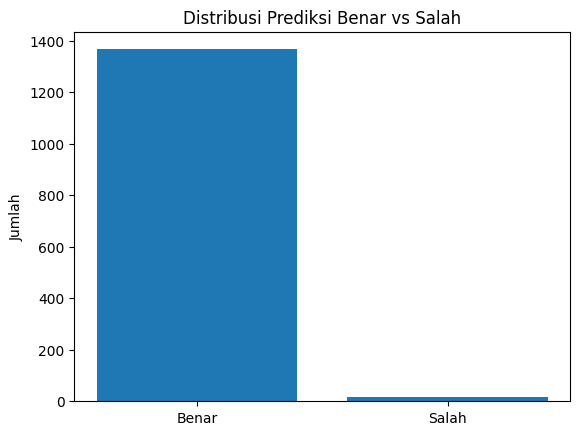

In [ ]:
# Pastikan predict dan y_test adalah array NumPy
predicts = np.array(predict)
y_tests = np.array(y_test)

# Bar Chart: Jumlah Prediksi Benar dan Salah
true_predictions = (predicts == y_test).sum()  # Hitung prediksi benar
false_predictions = (predicts != y_test).sum()  # Hitung prediksi salah

plt.bar(['Benar', 'Salah'], [true_predictions, false_predictions])
plt.title('Distribusi Prediksi Benar vs Salah')
plt.ylabel('Jumlah')
plt.show()

# Perbandingan Prediksi dan Data Asli (Subset)
subset_indices = np.random.choice(len(y_tests), size=10, replace=False)  # Pilih subset random
subset_actual = np.array(y_tests)[subset_indices]
subset_predicted = np.array(predicts)[subset_indices]

**EVALUASI MODEL**

F1-Score

In [ ]:
# Evaluasi menggunakan F1-Score
f1 = f1_score(y_test, predict, average='macro')
print('F1-Score:', f1)

# F1-Score per kelas
f1_per_class = f1_score(y_test, predict, average=None)
print('\nF1-Score per Class:', f1_per_class)

F1-Score: 0.987735704999723

F1-Score per Class: [0.98177921 0.99782135 0.98360656]


Precession Recall

In [ ]:
# Evaluasi Precision dan Recall
precision = precision_score(y_test, predict, average='macro')
recall = recall_score(y_test, predict, average='macro')
print('Precision:', precision)
print('Recall:', recall)

# Precision dan Recall per kelas
precision_per_class = precision_score(y_test, predict, average=None)
recall_per_class = recall_score(y_test, predict, average=None)
print('\nPrecision per Class:', precision_per_class)
print('Recall per Class:', recall_per_class)

Precision: 0.9879246206878897
Recall: 0.9877733313386692

Precision per Class: [0.97033898 0.99565217 0.99778271]
Recall per Class: [0.99349241 1.         0.96982759]


Confusion Matrix

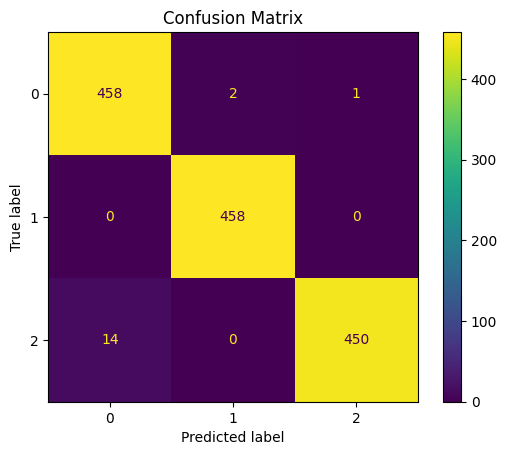

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='viridis')
plt.title('Confusion Matrix')
plt.show()